<h1> Analysis of Haberman's Survival Dataset</h1>

<h2>Final Project for Udacity's Intro to Inferential Statistics</h2>



<hr style="height:1px;border:none;" />

<h2> Introduction</h2>

According to [World Health Organization](http://www.who.int/mediacentre/factsheets/fs297/en/), "Cancer is the second leading cause of death globally, and was responsible for 8.8 million deaths in 2015. Globally, nearly 1 in 6 deaths is due to cancer.". And breast cancer is the fifth most deadly cancer with 571,000 deaths as of 2015. Knowing more about the disease will make a big difference in the patient's survival and treatment.

#### About the data

The Haberman's Survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

The data consists of following attributes:

1. Age of patient at time of operation 
2. Patient's year of operation
3. Number of positive axillary nodes detected - A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. 
4. Survival status - 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

Analysing the data might help us answer questions like:
1. <a href = '#R1'>Does patient's age at the time of operation affect survival (5 years after the operation)?</a>
2. <a href = '#R2'>Is there a relationship between patient's age and number of positive axillary nodes?</a>
3. <a href = '#R3'>Is there a relationship between number of surviving or perishing patients and the year the operation were performed?</a>

#### Load the data

In [1]:
# Importing the libraries for data manipulation and visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The data file has no headers, so they need to be assigned

column_names = ['Patient_Age', 'Year_of_Operation', 'Axillary_Nodes', 'Survival_Status']

df = pd.read_csv('data/haberman.data', header = None, names = column_names)

#### Let's take a look at the data.

In [3]:
df.head()

,Patient_Age,Year_of_Operation,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Convert the categorical variable's type to category.

In [4]:
# Creating a new variable that maps Survival_Status as 'Yes' for 1 and 'No' for 2
df['Survived'] = df.Survival_Status.map(lambda x: 'Yes' if (x == 1) else 'No')

df.Survived = df.Survived.astype('category')

#### Descriptive Statistics

In [5]:
df[['Patient_Age', 'Year_of_Operation', 'Axillary_Nodes', 'Survived']].describe()

,Patient_Age,Year_of_Operation,Axillary_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


<h2> Research Question & Hypothesis </h2>


<a name = 'R1'><h3> Research Question 1:</h3></a>

<i>Does patient's age at the time of operation affect survival (5 years after the operation)? Or in other words, do younger patients have higher chance of surviving?</i>

<b>Hypothesis</b>

<b>H<sub>0</sub></b> : Patient's age at the time of surgery makes no difference to survival after 5 years. That is, mean age of those who survived and those who perished is the same. $$H_0: \mu1 - \mu2 = 0$$

<b>H<sub>a</sub></b>: Younger patients have a better chance of surviving five years after the operation. $$H_a: \mu1 -  \mu2 < 0$$

<b>Age distribution</b>

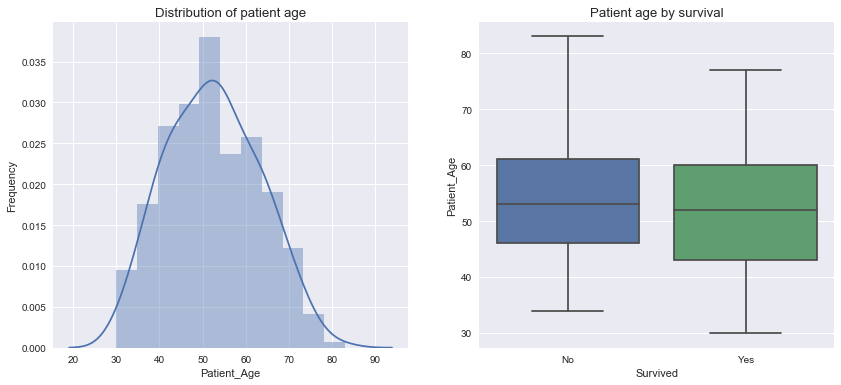

In [6]:
# Distribution of Age

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

sns.set(font_scale=1.1)

ax1.set(xlabel = 'Patient age at the time of operation',
       ylabel = 'Frequency',
       title = 'Distribution of patient age')
sns.distplot(df.Patient_Age, ax = ax1)

# Distribution of age by survival

ax2.set(ylabel = 'Patient age at the time of operation',
       title = 'Patient age by survival')
sns.boxplot(x = df.Survived, y = df.Patient_Age, ax = ax2 )

Observations:
1. The distribution of patient age is almost normal. 
2. Mean age of patients that survived is a bit lower than that of those who did not.
3. The age distribution of the perished patients is a bit skewed towards the right and is narrower. Whereas, the age distribution of the surviving patients is broader and more symmetric.

#### Descriptive statistics of age by survival

In [7]:
# Some descriptive statistics of patients by survival
df.groupby('Survived').describe()[['Patient_Age']]

Patient_Age
Survived                   
No       count    81.000000
         mean     53.679012
         std      10.167137
         min      34.000000
         25%      46.000000
         50%      53.000000
         75%      61.000000
         max      83.000000
Yes      count   225.000000
         mean     52.017778
         std      11.012154
         min      30.000000
         25%      43.000000
         50%      52.000000
         75%      60.000000
         max      77.000000

#### Experimental Design

For testing our hypothesis, we will use the 1 tailed, 2-sample t-test for independence.
This test is appropriate since,
1. the age distribution is approximately normal and number of observations is greater than 30 and
2. the samples are independent since a patient cannot have survived and perished at the same time.

#### Computing t-statistic
Since the variance for the survived and perished patient ages is different, the t statistic will be calculated using:

$$t^* = \frac{\mu_1 - \mu_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

#### degrees of freedom

$$df = \frac {[\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}]^2} { \frac{(\frac{s_1^2}{n1})^2} {n-1} + \frac{(\frac{s_2^2}{n2})^2} {n-2} }$$

In [8]:
mu1 = df[df.Survived == 'Yes'].Patient_Age.mean()
s1 = df[df.Survived == 'Yes'].Patient_Age.std()
n1 = len(df[df.Survived == 'Yes'].Patient_Age)

mu2 = df[df.Survived == 'No'].Patient_Age.mean()
s2 = df[df.Survived == 'No'].Patient_Age.std()
n2 = len(df[df.Survived == 'No'].Patient_Age)

from __future__ import division
from math import sqrt

t_stat = (mu1 - mu2) / sqrt(((s1 ** 2) / n1) + ((s2 ** 2) / n2))

degree_freedom = (((s1 ** 2) / n1) + ((s2 ** 2) / n2))**2 / ((((s1**2 / n1) ** 2) / (n1 - 1)) + (((s2**2 / n2) ** 2) / (n2 - 1)))
print 't* = {0}\ndegrees of freedom = {1}'.format(t_stat, degree_freedom)

t* = -1.23303365619
degrees of freedom = 152.149358613


#### Test result

The left tailed critical t-statistic at significance level of 5% and degrees of freedom = 152 (using the t-table) is -1.660. Since we are testing for left side, to reject the null hypothesis our t-statistic must be less than -1.660.

#### Conclusion

With a test statistic of -1.23 and critical value of -1.660 at a 5% level of significance, we do not have enough statistical evidence to reject the null hypothesis. 

Hence, from the available data we cannot say that the surviving and perished patients have statistically significant age difference.

<a name = 'R2'><h3>Research Question 2:</h3></a>

<i>Is there a relationship between patient age and number of positive axillary nodes detected?</i>

<b>Hypothesis:</b>

<b>H<sub>0</sub></b> : There is no relationship between patient's age and number of positive axillary nodes.


<b>H<sub>a</sub></b>: There is a relationship between patient's age and number of positive axillary nodes.


#### Descriptive Statistics

In [9]:
df[['Patient_Age', 'Axillary_Nodes']].describe()

,Patient_Age,Axillary_Nodes
count,306.000000,306.000000
mean,52.457516,4.026144
std,10.803452,7.189654
min,30.000000,0.000000
25%,44.000000,0.000000
50%,52.000000,1.000000
75%,60.750000,4.000000
max,83.000000,52.000000


<b>Experimental Design</b>

We can answer this question with the help of scatter plot. In scatter plot, each pair of data points is represented as a single point on the plane. The more linear our set of points are the stronger the relationship between the two data sets is. The strength of this relationship can be described by the correlation coefficient.

<b>Correlation Coefficient</b>
$$ r = \frac {Covariance(x, y)} {S_xS_y} $$

where,
* $r$ - correlation coefficient
* $Covariance(x, y)$ - a measure of how much x and y vary together
* $S_x$ and $S_y$ - sample standard deviations of x and y

The value of $r$ ranges between 1 and -1 where,
- -1 indicates negative relationship
- 1 indicates positive relationship
- 0 indicates no relationship

Hypothesis in terms of the coefficient - 

<b>H<sub>0</sub></b> : $r = 0$

<b>H<sub>a</sub></b>: $r \ne 0$

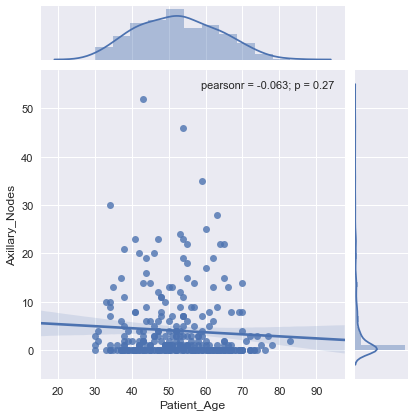

In [10]:
sns.jointplot(df.Patient_Age, df.Axillary_Nodes, size = 6, kind = 'reg')

<b>Test Result</b>

Patients of all ages excepting those in their late 70's have mostly 0 positive axillary nodes. The plot is dense at the bottom where the nodes are less than 5, and gets sparser with increase in the nodes detected. 
Some points are close to the fitted regression line but other points are far from it, which indicates a weak negative linear relationship.

$$r = -0.063$$

#### Conclusion

With the correlation coefficient $r$ of -0.063 so close to 0, we fail to reject the null hyposthesis. Thus, we cannot say that there exist a significant relationship between patient's age and number of positive axillary nodes.

<a name = 'R3'><h3>Research Question 3:</h3></a>

<i>Is there a relationship between number of surviving or perishing patients and the year the operation were performed ?</i>


#### Hypothesis:


<b>H<sub>0</sub></b> : The number of surviving or perishing patients and the year the operation were performed are independent.

<b>H<sub>a</sub></b> : The number of surviving or perishing patients and the year the operation were performed are not independent.

<b>Number of patients survived and perished from 1958 - 1969</b>

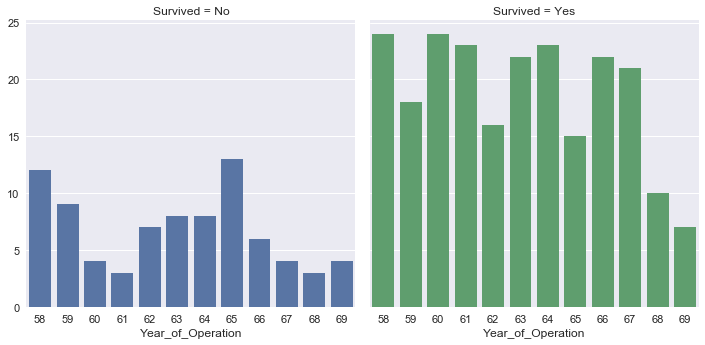

In [11]:
g = sns.FacetGrid(df, col = 'Survived', size = 5, hue = 'Survived')
g.map(sns.countplot, 'Year_of_Operation')

<b>Frequency table</b>

In [12]:
df.pivot_table(index = 'Survived', columns = 'Year_of_Operation', values = 'Survival_Status', aggfunc = 'count')

Year_of_Operation,58,59,60,61,62,63,64,65,66,67,68,69
Survived,,,,,,,,,,,,
No,12,9,4,3,7,8,8,13,6,4,3,4
Yes,24,18,24,23,16,22,23,15,22,21,10,7


<b>Observed Frequencies</b>

In [13]:
# Binning the Year_of_Operation variable, where each bin is of 2 years
df['Year_Bin'] = pd.cut(df.Year_of_Operation, range(57, 70, 2))

table = df.pivot_table(index = 'Survived', columns = 'Year_Bin', values = 'Survival_Status', 
                       aggfunc='count', margins=True, margins_name = 'Total')

#expected = (table[0:1].values[0][:-1], table[1:2].values[0][:-1])
table

Year_Bin,"(57, 59]","(59, 61]","(61, 63]","(63, 65]","(65, 67]","(67, 69]",Total
Survived,,,,,,,
No,21.0,7.0,15.0,21.0,10.0,7.0,81.0
Yes,42.0,47.0,38.0,38.0,43.0,17.0,225.0
Total,63.0,54.0,53.0,59.0,53.0,24.0,306.0


<b>Experimental Design</b>

For this hypothesis, chi-square would be useful. This is because, our data satisfies following:- 

1. Each frequency in the contingency table is > 5
2. The categories of the variables are mutually exclusive. That is, a patient either had an operation in only one of the year bins.
3. The patient groups are independent, that is a patient either survived or perished.


<b>Chi-Square test for independence</b>

$$\chi^2 = \frac {\sum(O - E)^2} {E}$$

Where,
- $\chi^2$ - test statistic
- $O$ - Observed frequencies
- $E$ - Expected frequencies, and $E = \frac {Row Total * Column Total}  {N}$

In [14]:
#from scipy import stats

#print stats.chi2_contingency(table)

observed = (table[0:1].values[0][:-1], table[1:2].values[0][:-1])

expected = []

for x in table.Total.values[:-1]:
    expected.append((x * table[2:3].values[0][:-1]) / table.Total[-1])
    
chi_computed =  sum(((observed[0] - expected[0])**2) / expected[0]) + sum(((observed[1] - expected[1])**2) / expected[1])

print 'Expected Values\n----------------------------------------------------------------'
print expected[0]
print expected[1]

degree_of_freedom = (table.index.values.size - 1) * (table.columns.values.size - 1)
print '\nChi-square statistic = {0}\nDegrees of freedom = {1}'.format(chi_computed, degree_of_freedom)


Expected Values
----------------------------------------------------------------
[ 16.67647059  14.29411765  14.02941176  15.61764706  14.02941176
   6.35294118]
[ 46.32352941  39.70588235  38.97058824  43.38235294  38.97058824
  17.64705882]

Chi-square statistic = 10.8640846418
Degrees of freedom = 12


<b>Test Result</b>

The critical $\chi^2$ value at 5% significance level and degrees of freedom = $12$, is $21.026$. To reject the null hypothesis, our computed $\chi^2$ value must be greater than the critical value.


<b>Conclusion</b>

We fail to reject null because the test statistic is snaller than the critical statistic (10.8640846418 < 21.026). Hence, we do not have statistically significant evidence at $\alpha = 0.05$ to show that the year the operation was performed and number of operations are related.

<h2>Final Remarks</h2>

There are many other factors which influence the survival of patients. However, even with a small number of variables, we were able to test for -
1. impact of patient's age at the time of operation,
2. relationship between patient's age and number of positive axillary nodes and,
3. the relationship between number of surviving or perishing patients and the year the operation were performed.

Further tests could explain other variables that impact survival of the patient and those that affect the number of positive axillary nodes. This may aide with early detection or even with prevention.

## References
1. [National Institute of Cancer Prevention and Research](http://cancerindia.org.in/cp/index.php/know-about-cancer/statistics#breast-cancer)
2. [World Health Organization](http://www.who.int/mediacentre/factsheets/fs297/en/)
3. [t-Table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)
4. [Chi-Square Distribution Table](http://sites.stat.psu.edu/~mga/401/tables/Chi-square-table.pdf)
5. [Udacity - Intro to Inferential Statistics](https://www.udacity.com/course/intro-to-inferential-statistics--ud201)